# 12. Correlation analysis: categoric variables

In [12]:
devtools::install_github("pmartinezarbizu/pairwiseAdonis/pairwiseAdonis")


── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpB3JoS8/remotes3495670bb488/pmartinezarbizu-pairwiseAdonis-cb190f7/pairwiseAdonis/DESCRIPTION’
─  preparing ‘pairwiseAdonis’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘pairwiseAdonis_0.4.1.tar.gz’
   


In [1]:
library(tidyverse)
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(vegan)
library(dplyr) 
library(ggpubr)
library(Hmisc)
library(corrplot)
library(ggpmisc)
library(scales)
library(broom)
library(grid)
library(png)
library(forcats)
library(gridExtra)
library(tibble)
library(devtools)
library(pairwiseAdonis)
library(ggsignif)
library(FSA)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:

In [2]:
setwd("/home/strawberry/Documents/Collaborations/sinusite_edwin/data")
ReadCounts_TaxAnnotation <- read.delim("./ReadCounts_TaxAnnotation_SILVA.tsv")
metadata_filtered <- read.delim("./metadata_filtered_Diversity.tsv")
# staph_species_plot <- read.delim("./staph_species_plot.tsv")

head(ReadCounts_TaxAnnotation)
head(metadata_filtered)
# head(staph_species_plot)

,ID_Sample,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species,⋯,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay,AlignmentEfficiency
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,0001967K_T1,AB646616,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus saccharolyticus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
2,0001967K_T1,AF015929,4,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
3,0001967K_T1,AGEF01000005,1,Bacteria,Bacillota,Bacilli,Lactobacillales,Carnobacteriaceae,Dolosigranulum,Dolosigranulum pigrum ATCC 51524,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
4,0001967K_T1,AIYD01000002,2,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus M1016,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
5,0001967K_T1,AJ439343,1,Bacteria,Actinomycetota,Actinobacteria,Mycobacteriales,Corynebacteriaceae,Corynebacterium,Corynebacterium pseudodiphtheriticum,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
6,0001967K_T1,AJ938182,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus RF122,⋯,1,58.7,1,1,0,38,100,10,15,99.85097


,ID_Sample,SNOT22,SNOT22nasal,LK_Total,LK_Secret,ClinicCtrl,AntUse,Cortuse,Patient,Filename,⋯,Timepoint,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0001967K_T1,38,12,4,2,NC,1,1,0001967K,0001967K_T1.fastq,⋯,T1,1,58.7,1,1,0,38,100,10,15
2,0001967K_T3,96,26,10,4,NC,1,0,0001967K,0001967K_T3.fastq,⋯,T3,1,58.7,1,1,0,38,100,10,15
3,0001967K_T6,79,19,6,4,NC,1,1,0001967K,0001967K_T6.fastq,⋯,T6,1,58.7,1,1,0,38,100,10,15
4,0088303G_T0,102,37,8,2,NC,NA,0,0088303G,0088303G_T0.fastq,⋯,T0,2,60.3,1,1,0,667,800,58,22
5,0088303G_T1,32,7,4,1,NC,1,0,0088303G,0088303G_T1.fastq,⋯,T1,2,60.3,1,1,0,667,800,58,22
6,0088303G_T3,NA,NA,NA,NA,NA,0,0,0088303G,0088303G_T3.fastq,⋯,T3,2,60.3,1,1,0,667,800,58,22


In [19]:
# Assess Overall Community Composition Differences across Clinical Control groups
## Define PERMANOVA analysis function
run_permanova <- function(file_path, metadata_df) {
  # Load abundance table
  abund_df <- read.delim(file_path, check.names = FALSE, row.names = 1)
  abund_df <- abund_df %>%
    rownames_to_column(var = "ID_Sample")

  # Merge with metadata
  merged_df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, ClinicCtrl), by = "ID_Sample") %>%
    filter(!is.na(ClinicCtrl))

  # Set ID_Sample as rownames again for vegan
  rownames(merged_df) <- merged_df$ID_Sample
  genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl)

  # Compute Bray-Curtis distance
  bc_dist <- vegdist(genus_data, method = "bray")

  # Run PERMANOVA
  permanova_result <- adonis2(bc_dist ~ ClinicCtrl, data = merged_df, permutations = 999)

  # Run pairwise PERMANOVA
  pairwise_result <- pairwise.adonis(genus_data, factors = merged_df$ClinicCtrl, sim.method = "bray", p.adjust.m = "bonferroni")

  # Return results
  list(
    File = basename(file_path),
    PERMANOVA = permanova_result,
    Pairwise = pairwise_result
  )
}

## Get list of abundance files
abund_files <- list.files(path = "./", pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$", full.names = TRUE)

## Run PERMANOVA for all
permanova_results_all <- lapply(abund_files, run_permanova, metadata_df = metadata_filtered)

## Extract timepoints from file names and assig them to the results list
timepoint_names <- gsub(".*Abund_by_Timepoint_4_Corr_(T[0-9]+)\\.tsv$", "\\1", abund_files)
names(permanova_results_all) <- timepoint_names

print(head(permanova_results_all))

$T0
$T0$File
[1] "Abund_by_Timepoint_4_Corr_T0.tsv"

$T0$PERMANOVA
Permutation test for adonis under reduced model
Permutation: free
Number of permutations: 999

adonis2(formula = bc_dist ~ ClinicCtrl, data = merged_df, permutations = 999)
         Df SumOfSqs      R2      F Pr(>F)
Model     1   0.1893 0.01773 0.6316  0.731
Residual 35  10.4910 0.98227              
Total    36  10.6803 1.00000              

$T0$Pairwise
     pairs Df SumsOfSqs   F.Model         R2 p.value p.adjusted sig
1 NC vs PC  1  0.189329 0.6316377 0.01772688   0.739      0.739    


$T1
$T1$File
[1] "Abund_by_Timepoint_4_Corr_T1.tsv"

$T1$PERMANOVA
Permutation test for adonis under reduced model
Permutation: free
Number of permutations: 999

adonis2(formula = bc_dist ~ ClinicCtrl, data = merged_df, permutations = 999)
         Df SumOfSqs      R2      F Pr(>F)
Model     2   0.2911 0.04906 0.7223  0.672
Residual 28   5.6422 0.95094              
Total    30   5.9332 1.00000              

$T1$Pairwise
     pairs

In [ ]:
# Assess Genus-by-Genus Differential Abundance across Clinical Control groups

In [28]:
# Get abundance files
abund_files <- list.files(path = "./", pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$", full.names = TRUE)

# Define function for Kruskal-Wallis + Dunn per genus
run_kw_dunn <- function(file_path, metadata_df) {
  # Load abundance table and reshape to long format
  abund_df <- read.delim(file_path, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance")

  # Merge with metadata
  df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, ClinicCtrl), by = "ID_Sample") %>%
    filter(!is.na(ClinicCtrl))

  # Kruskal-Wallis per genus (sorted by adjusted p-value)
  kw_results <- df %>%
    group_by(Genus) %>%
    summarise(
      p_kw = kruskal.test(RelAbundance ~ ClinicCtrl)$p.value,
      .groups = "drop"
    ) %>%
    mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
    arrange(p_adjusted)

  # Dunn's test for all genera (sorted by adjusted p)
  dunn_results <- df %>%
    group_by(Genus) %>%
    do({
      dunnTest(RelAbundance ~ ClinicCtrl, data = ., method = "bonferroni")$res
    }) %>%
    ungroup() %>%
    arrange(Genus, P.adj)

  # Output
  list(
    Timepoint = basename(file_path),
    KW = kw_results,
    Dunn = dunn_results
  )
}

# Run across all timepoints
kw_dunn_results <- lapply(abund_files, run_kw_dunn, metadata_df = metadata_filtered)

# Assign timepoint names
timepoint_names <- gsub(".*Abund_by_Timepoint_4_Corr_(T[0-9]+)\\.tsv$", "\\1", abund_files)
names(kw_dunn_results) <- timepoint_names

Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning me

In [29]:
kw_dunn_results

Genus,p_kw,p_adjusted
<chr>,<dbl>,<dbl>
Granulicatella,0.0003742586,0.01272479
Bacillus,0.0015205989,0.02585018
Dolosigranulum,0.0683670198,0.77482622
Achromobacter,0.6182508066,0.92142413
Acinetobacter,0.7978444998,0.92142413
Aggregatibacter,0.5720458767,0.92142413
Anaerococcus,0.8401220001,0.92142413
Burkholderia-Caballeronia-Paraburkholderia,0.1429498015,0.92142413
Citrobacter,0.5301272517,0.92142413


In [42]:
print(head(boxplot_data_t0))

# A tibble: 6 × 4
  ID_Sample   Genus          RelAbundance ClinicCtrl
  <chr>       <chr>                 <dbl> <chr>     
1 0088303G_T0 Bacillus               0    NC        
2 0088303G_T0 Granulicatella         0    NC        
3 0110059G_T0 Bacillus               0    NC        
4 0110059G_T0 Granulicatella         0    NC        
5 0130765A_T0 Bacillus               2.09 NC        
6 0130765A_T0 Granulicatella         0    NC        


Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  RelAbundance by ClinicCtrl
W = 1, p-value = 0.001784
alternative hypothesis: true location shift is not equal to 0


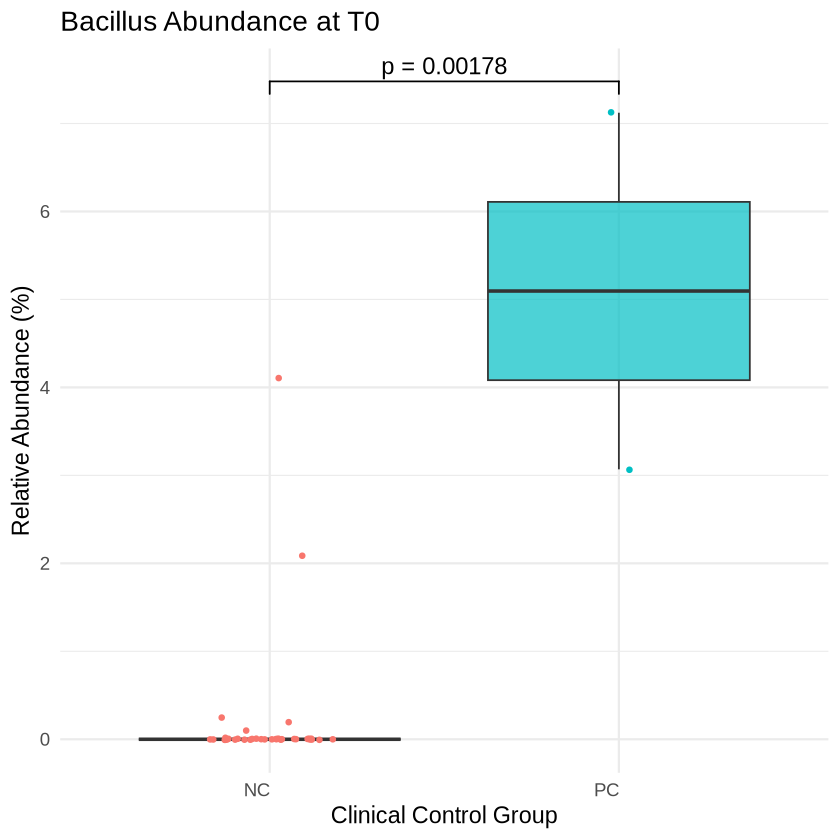

In [51]:
# Plot significant results
## Load T0 file
t0_file <- abund_files[grepl("T0", abund_files)]

## Prepare data for Bacillus only, and groups NC vs PC
bacillus_data <- read.delim(t0_file, check.names = FALSE, row.names = 1) %>%
  rownames_to_column("ID_Sample") %>%
  pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl), by = "ID_Sample") %>%
  filter(Genus == "Bacillus", ClinicCtrl %in% c("NC", "PC"))

## Run Wilcoxon test
wilcox_bacillus <- wilcox.test(RelAbundance ~ ClinicCtrl, data = bacillus_data, exact = TRUE, p.adjust = bonferroni)
p_value <- signif(wilcox_bacillus$p.value, 3)
wilcox_bacillus

## Plot
ggplot(bacillus_data, aes(x = ClinicCtrl, y = RelAbundance, fill = ClinicCtrl)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.2, size = 1.2, aes(color = ClinicCtrl)) +
  geom_signif(comparisons = list(c("NC", "PC")),
              annotations = paste0("p = ", p_value),
              textsize = 5,
              tip_length = 0.02) +
  labs(
    title = "Bacillus Abundance at T0",
    x = "Clinical Control Group",
    y = "Relative Abundance (%)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1),
    legend.position = "none"
  )

In [67]:
# Assess Differential Shannon Index across Clinical Control groups

# Load alpha diversity table
alpha_df <- read.delim("AlhaDiversity_Indexes.tsv", check.names = FALSE)

# Clean sample IDs (remove leading "X" if present)
alpha_df <- alpha_df %>%
  mutate(ID_Sample = gsub("^X", "", ID_Sample))

# Merge with metadata
alpha_merged <- alpha_df %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, Timepoint), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl), !is.na(Timepoint), !is.na(Shannon))

# Create a named list of data frames per timepoint
alpha_split <- split(alpha_merged, alpha_merged$Timepoint)

# Run Kruskal-Wallis for each timepoint
kw_results_list <- lapply(names(alpha_split), function(tp) {
  df <- alpha_split[[tp]]
  kw <- kruskal.test(Shannon ~ ClinicCtrl, data = df)
  tibble(Timepoint = tp, p_kw = kw$p.value)
})

kw_results <- bind_rows(kw_results_list) %>%
  mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
  arrange(p_adjusted)

print(kw_results)

# A tibble: 5 × 3
  Timepoint   p_kw p_adjusted
  <chr>      <dbl>      <dbl>
1 T6        0.0600      0.300
2 T12       0.144       0.360
3 T0        0.737       0.810
4 T1        0.810       0.810
5 T3        0.496       0.810


In [69]:
dunn_results_list <- lapply(names(alpha_split), function(tp) {
  df <- alpha_split[[tp]]
  dunn <- dunnTest(Shannon ~ ClinicCtrl, data = df, method = "bonferroni")$res
  dunn$Timepoint <- tp
  dunn
})

dunn_results <- bind_rows(dunn_results_list)
dunn_results

Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”


Comparison,Z,P.unadj,P.adj,Timepoint
<chr>,<dbl>,<dbl>,<dbl>,<chr>
NC - PC,-0.3358701,0.73696885,0.7369689,T0
C - NC,-0.1275407,0.89851247,1.0000000,T1
C - PC,-0.5665621,0.57101175,1.0000000,T1
NC - PC,-0.4668417,0.64061314,1.0000000,T1
C - NC,-0.1069447,0.91483284,1.0000000,T12
C - PC,-1.2224799,0.22152622,0.6645787,T12
NC - PC,-1.8180601,0.06905495,0.2071649,T12
C - NC,1.1814837,0.23741061,0.7122318,T3
C - PC,0.7889108,0.43016416,1.0000000,T3


In [4]:
##################### BOOLEAN VARIABLES 
## Antibiotic and Corticoid Use

In [26]:
# Assess Genus-by-Genus Differential Abundance between groups with different antibiotic use
# List all abundance files matching the pattern
abund_files <- list.files(path = "./", pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$", full.names = TRUE)

# Ensure AntUse is logical (TRUE/FALSE)
metadata_filtered <- metadata_filtered %>%
  mutate(AntUse = as.logical(AntUse))

# Function to process each file
run_wilcox_for_file <- function(file) {
  # Load abundance data
  abund_df <- read.delim(file, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance")
  
  # Merge with metadata and filter
  df <- abund_df %>%
    left_join(metadata_filtered %>% select(ID_Sample, AntUse), by = "ID_Sample") %>%
    filter(!is.na(AntUse))
  
  # Wilcoxon test per genus
  wilcox_results <- df %>%
    group_by(Genus) %>%
    summarise(
      p_wilcox = if (n_distinct(AntUse) == 2)
        suppressWarnings(wilcox.test(RelAbundance ~ AntUse, exact = FALSE)$p.value)
      else NA_real_,
      .groups = "drop"
    ) %>%
    mutate(
      p_adjusted = p.adjust(p_wilcox, method = "bonferroni"),
      file = basename(file)  # add file name to track
    ) %>%
    arrange(p_adjusted)
  
  return(wilcox_results)
}

# Apply the function to all files and combine results
all_results <- map_dfr(abund_files, run_wilcox_for_file)

# View top results across all files
print(head(all_results, 20))

# A tibble: 20 × 4
   Genus                                      p_wilcox p_adjusted file          
   <chr>                                         <dbl>      <dbl> <chr>         
 1 Achromobacter                                0.827           1 Abund_by_Time…
 2 Acinetobacter                                0.798           1 Abund_by_Time…
 3 Anaerococcus                                 0.510           1 Abund_by_Time…
 4 Bacillus                                     0.602           1 Abund_by_Time…
 5 Burkholderia-Caballeronia-Paraburkholderia   0.827           1 Abund_by_Time…
 6 Citrobacter                                  0.362           1 Abund_by_Time…
 7 Corynebacterium                              0.0658          1 Abund_by_Time…
 8 Cutibacterium                                0.479           1 Abund_by_Time…
 9 Dialister                                    0.695           1 Abund_by_Time…
10 Dolosigranulum                               0.896           1 Abund_by_Time…
11 Entero

In [27]:
## same but for alpha diversity 
# Load required libraries
library(tidyverse)

# Load alpha diversity table
alpha_df <- read.delim("AlhaDiversity_Indexes.tsv", check.names = FALSE)

# Clean sample IDs (remove leading "X" if present)
alpha_df <- alpha_df %>%
  mutate(ID_Sample = gsub("^X", "", ID_Sample))

# Ensure AntUse is a factor or character for comparisons
metadata_filtered <- metadata_filtered %>%
  mutate(AntUse = as.factor(AntUse))

# Merge with metadata
alpha_merged <- alpha_df %>%
  left_join(metadata_filtered %>% select(ID_Sample, AntUse, Timepoint), by = "ID_Sample") %>%
  filter(!is.na(AntUse), !is.na(Timepoint), !is.na(Shannon))

# Split by timepoint
alpha_split <- split(alpha_merged, alpha_merged$Timepoint)

# Function to perform Wilcoxon test per timepoint
run_wilcox_shannon <- function(df) {
  timepoint <- unique(df$Timepoint)
  
  if (n_distinct(df$AntUse) == 2) {
    test <- suppressWarnings(wilcox.test(Shannon ~ AntUse, data = df, exact = FALSE))
    tibble(
      Timepoint = timepoint,
      p_wilcox = test$p.value
    )
  } else {
    tibble(
      Timepoint = timepoint,
      p_wilcox = NA_real_
    )
  }
}

# Run test for each timepoint and adjust p-values
shannon_results <- map_dfr(alpha_split, run_wilcox_shannon) %>%
  mutate(p_adjusted = p.adjust(p_wilcox, method = "bonferroni"))

# View results
print(shannon_results)

# A tibble: 4 × 3
  Timepoint p_wilcox p_adjusted
  <chr>        <dbl>      <dbl>
1 T1          0.525      1     
2 T12         0.950      1     
3 T3          0.0114     0.0457
4 T6          0.509      1     


Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Shannon by AntUse
W = 125, p-value = 0.01143
alternative hypothesis: true location shift is not equal to 0



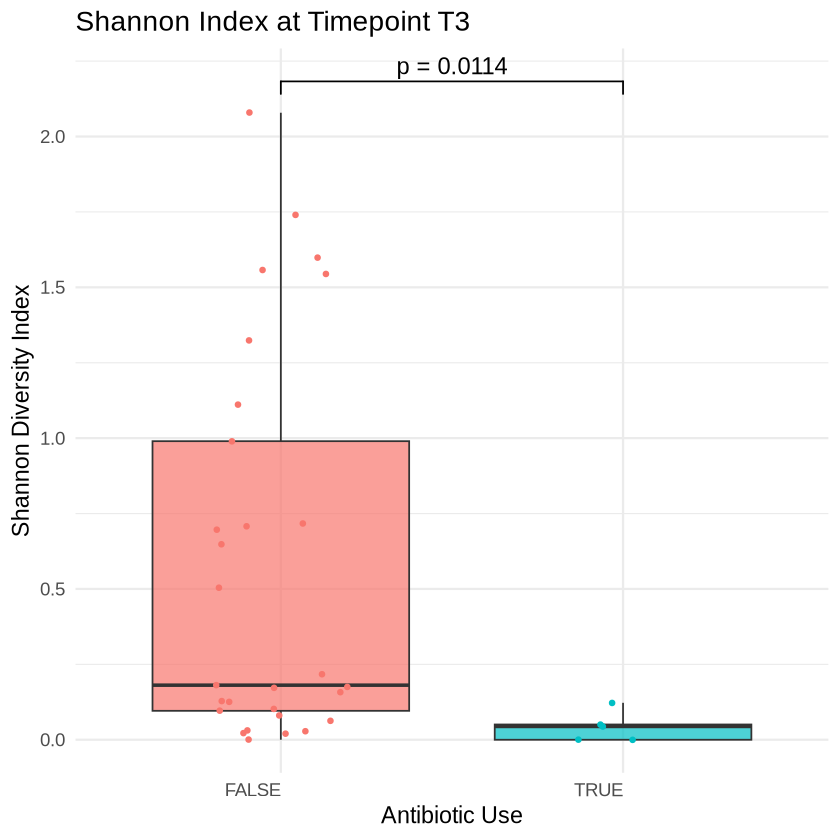

In [36]:
#### plot significant results
## Extract T3 data
t3_data <- alpha_merged %>%
  filter(Timepoint == "T3")

## Run Wilcoxon test for T3
t3_wilcox <- wilcox.test(Shannon ~ AntUse, data = t3_data)
print(t3_wilcox)

## Pull p-value for annotation
p_value <- shannon_results %>%
  filter(Timepoint == "T3") %>%
  pull(p_wilcox) %>%
  signif(3)

## Plot
ggplot(t3_data, aes(x = AntUse, y = Shannon, fill = AntUse)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.2, size = 1.2, aes(color = AntUse)) +
  geom_signif(comparisons = list(c("TRUE", "FALSE")),
              annotations = paste0("p = ", p_value),
              textsize = 5,
              tip_length = 0.02) +  # Removed manual = TRUE
  labs(
    title = "Shannon Index at Timepoint T3",
    x = "Antibiotic Use",
    y = "Shannon Diversity Index"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1),
    legend.position = "none"
  )

In [37]:
# Assess Genus-by-Genus Differential Abundance between groups with different corticoid use
# List all abundance files matching the pattern
abund_files <- list.files(path = "./", pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$", full.names = TRUE)

# Ensure Cortuse is logical (TRUE/FALSE)
metadata_filtered <- metadata_filtered %>%
  mutate(Cortuse = as.logical(Cortuse))

# Function to process each file
run_wilcox_for_file <- function(file) {
  # Load abundance data
  abund_df <- read.delim(file, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance")
  
  # Merge with metadata and filter
  df <- abund_df %>%
    left_join(metadata_filtered %>% select(ID_Sample, Cortuse), by = "ID_Sample") %>%
    filter(!is.na(Cortuse))
  
  # Wilcoxon test per genus
  wilcox_results <- df %>%
    group_by(Genus) %>%
    summarise(
      p_wilcox = if (n_distinct(Cortuse) == 2)
        suppressWarnings(wilcox.test(RelAbundance ~ Cortuse, exact = FALSE)$p.value)
      else NA_real_,
      .groups = "drop"
    ) %>%
    mutate(
      p_adjusted = p.adjust(p_wilcox, method = "bonferroni"),
      file = basename(file)  # add file name to track
    ) %>%
    arrange(p_adjusted)
  
  return(wilcox_results)
}

# Apply the function to all files and combine results
all_results <- map_dfr(abund_files, run_wilcox_for_file)

# View top results across all files
print(head(all_results, 20))

# A tibble: 20 × 4
   Genus                                      p_wilcox p_adjusted file          
   <chr>                                         <dbl>      <dbl> <chr>         
 1 Enterobacter                                0.00316      0.108 Abund_by_Time…
 2 Achromobacter                               0.434        1     Abund_by_Time…
 3 Acinetobacter                               0.809        1     Abund_by_Time…
 4 Aggregatibacter                             0.0856       1     Abund_by_Time…
 5 Anaerococcus                                0.705        1     Abund_by_Time…
 6 Bacillus                                    0.280        1     Abund_by_Time…
 7 Burkholderia-Caballeronia-Paraburkholderia  0.863        1     Abund_by_Time…
 8 Citrobacter                                 0.755        1     Abund_by_Time…
 9 Corynebacterium                             0.0528       1     Abund_by_Time…
10 Cutibacterium                               0.578        1     Abund_by_Time…
11 Dialis

In [38]:
## same but for alpha diversity 
# Load required libraries
library(tidyverse)

# Load alpha diversity table
alpha_df <- read.delim("AlhaDiversity_Indexes.tsv", check.names = FALSE)

# Clean sample IDs (remove leading "X" if present)
alpha_df <- alpha_df %>%
  mutate(ID_Sample = gsub("^X", "", ID_Sample))

# Ensure AntCortuseUse is a factor or character for comparisons
metadata_filtered <- metadata_filtered %>%
  mutate(Cortuse = as.factor(Cortuse))

# Merge with metadata
alpha_merged <- alpha_df %>%
  left_join(metadata_filtered %>% select(ID_Sample, Cortuse, Timepoint), by = "ID_Sample") %>%
  filter(!is.na(Cortuse), !is.na(Timepoint), !is.na(Shannon))

# Split by timepoint
alpha_split <- split(alpha_merged, alpha_merged$Timepoint)

# Function to perform Wilcoxon test per timepoint
run_wilcox_shannon <- function(df) {
  timepoint <- unique(df$Timepoint)
  
  if (n_distinct(df$Cortuse) == 2) {
    test <- suppressWarnings(wilcox.test(Shannon ~ Cortuse, data = df, exact = FALSE))
    tibble(
      Timepoint = timepoint,
      p_wilcox = test$p.value
    )
  } else {
    tibble(
      Timepoint = timepoint,
      p_wilcox = NA_real_
    )
  }
}

# Run test for each timepoint and adjust p-values
shannon_results <- map_dfr(alpha_split, run_wilcox_shannon) %>%
  mutate(p_adjusted = p.adjust(p_wilcox, method = "bonferroni"))

# View results
print(shannon_results)

# A tibble: 5 × 3
  Timepoint p_wilcox p_adjusted
  <chr>        <dbl>      <dbl>
1 T0          0.239       1    
2 T1          0.828       1    
3 T12         0.672       1    
4 T3          0.0725      0.362
5 T6          0.300       1    
